<a href="https://colab.research.google.com/github/pgup2501/python-data-analytics-workshop/blob/main/EDA_home_credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Get the data from google drive 
As data is more than 256 MB so git hub is not supporting it 

from google.colab import drive
drive.mount('/content/gdrive')

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format

Upload the data to google drive and mount the Gdrive

In [127]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Read the Application data

In [128]:
dir = "/content/gdrive/MyDrive/Colab Notebooks/home_credit_dataset"
df_train = pd.read_csv(dir+"/application_train.csv")
df_test= pd.read_csv(dir+"/application_test.csv")

In [129]:
print(df_train.shape)
print(df_test.shape)

(307511, 122)
(48744, 121)


Understand the data

In [130]:
df_train.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,"202,500.00","406,597.50","24,700.50","351,000.00",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,"-3,648.00",-2120,NaN,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08,0.26,0.14,0.02,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.63,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,reg oper account,block of flats,0.01,"Stone, brick",No,2.00,2.00,2.00,2.00,"-1,134.00",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,"270,000.00","1,293,502.50","35,698.50","1,129,500.00",Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,"-1,186.00",-291,NaN,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31,0.62,NaN,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.05,0.00,0.01,0.09,0.05,0.99,0.80,0.05,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.00,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.01,reg oper account,block of flats,0.07,Block,No,1.00,0.00,1.00,0.00,-828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,"67,500.00","135,000.00","6,750.00","135,000.00",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,-19046,-225,"-4,260.00",-2531,26.00,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.56,0.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,-815.00,0,0

In [131]:
target = df_train['TARGET']
df_train["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

Conclusion : Data is unbalanace , will go for confusion matrix and AUC for validation

# EDA for application data 

In [132]:
df_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,"307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,499.00","307,233.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","104,582.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,509.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","134,133.00","306,851.00","246,546.00","151,450.00","127,568.00","157,504.00","103,023.00","92,646.00","143,620.00","152,683.00","154,491.00","98,869.00","124,921.00","97,312.00","153,161.00","93,997.00","137,829.00","151,450.00","127,568.00","157,504.00","103,023.00","92,646.00","143,620.00","152,683.00","154,491.00","98,869.00","124,921.00","97,312.00","153,161.00","93,997.00","137,829.00","151,450.00","127,568.00","157,504.00","103,023.00","92,646.00","143,620.00","152,683.00","154,491.00","98,869.00","124,921.00","97,312.00","153,161.00","93,997.00","137,829.00","159,080.00","306,490.00","306,490.00","306,490.00","306,490.00","307,510.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","265,992.00","265,992.00","265,992.00","265,992.00","265,992.00","265,992.00"
mean,"278,180.52",0.08,0.42,"168,797.92","599,026.00","27,108.57","538,396.21",0.02,"-16,037.00","63,815.05","-4,986.12","-2,994.20",12.06,1.00,0.82,0.20,1.00,0.28,0.06,2.15,2.05,2.03,12.06,0.02,0.05,0.04,0.08,0.23,0.18,0.50,0.51,0.51,0.12,0.09,0.98,0.75,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.11,0.09,0.98,0.76,0.04,0.07,0.15,0.22,0.23,0.06,0.11,0.11,0.01,0.03,0.12,0.09,0.98,0.76,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.10,1.42,0.14,1.41,0.10,-962.86,0.00,0.71,0.00,0.02,0.09,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.03,0.27,0.27,1.90
std,"102,790.18",0.27,0.72,"237,123.15","402,490.78","14,493.74","369,446.46",0.01,"4,363.99","141,275

# Categorical Variables

In [133]:
df_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [134]:
def gender_encode(data):
  print (data['CODE_GENDER'].value_counts())
  data = data[data['CODE_GENDER']!="XNA"]
  print ("after", data['CODE_GENDER'].value_counts())
  return data
df_train = gender_encode(df_train)
df_test = gender_encode(df_test)

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
after F    202448
M    105059
Name: CODE_GENDER, dtype: int64
F    32678
M    16066
Name: CODE_GENDER, dtype: int64
after F    32678
M    16066
Name: CODE_GENDER, dtype: int64


Label Encoder and One Hot Encoding

In [135]:

# Create a label encoder object
from sklearn.preprocessing import LabelEncoder

def encode(df):
  le = LabelEncoder()
  le_count = 0
  # Iterate through the columns
  for col in df:
      if df[col].dtype == 'object':
          # If 2 or fewer unique categories
          if len(list(df[col].unique())) <= 2:
              le.fit(df[col])
              df[col] = le.transform(df[col])
              le_count += 1
  print ('{} variable are label encoded'.format(le_count))


  # One Hot Encoding 
  categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
  df = pd.get_dummies(df, columns= categorical_columns, dummy_na= True)
  print ('The shape of dataset after One hot encoding: {}'.format(df.shape))
  return df

app_train = encode(df_train)
app_test = encode(df_test)

4 variable are label encoded
The shape of dataset after One hot encoding: (307507, 253)
4 variable are label encoded
The shape of dataset after One hot encoding: (48744, 250)


**Aligning Training and Testing Data**

There need to be the same features (columns) in both the training and testing data. One-hot encoding has created more columns in the training data because there were some categorical variables with categories not represented in the testing data. To remove the columns in the training data that are not in the testing data, we need to align the dataframes. When we do the align, we must make sure to set axis = 1 to align the dataframes based on the columns and not on the rows!

In [136]:
align_train_data, align_test_data = app_train.align(app_test, join = 'inner', axis = 1)
align_train_data['TARGET'] = target
print('Training Features shape: ', align_train_data.shape)
print('Testing Features shape: ', align_test_data.shape)

Training Features shape:  (307507, 251)
Testing Features shape:  (48744, 250)


In [137]:
missing_val_count_by_column = align_train_data.isnull().sum()
missing_val_count_by_column = missing_val_count_by_column[missing_val_count_by_column > 0]
print('Number of columns with missing values: ', missing_val_count_by_column.shape[0])
missing_val_count_by_column.sort_values(ascending=False)

Number of columns with missing values:  61


COMMONAREA_MODE             214862
COMMONAREA_MEDI             214862
COMMONAREA_AVG              214862
NONLIVINGAPARTMENTS_MODE    213512
NONLIVINGAPARTMENTS_AVG     213512
                             ...  
EXT_SOURCE_2                   660
AMT_GOODS_PRICE                278
AMT_ANNUITY                     12
CNT_FAM_MEMBERS                  2
DAYS_LAST_PHONE_CHANGE           1
Length: 61, dtype: int64

lets do more of EDA 

In [138]:
align_train_data.describe()


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_nan,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_nan,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_EDUCATION_TYPE_nan,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_FAMILY_STATUS_nan,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_HOUSING_TYPE_nan,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_nan,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,WEEKDAY_APPR_PROCESS_START_nan,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANI

Finding columns with negative mean

In [139]:
meancol = align_train_data.mean(axis = 0)
negative_mean_col = meancol[meancol < 0]
negative_mean_col

DAYS_BIRTH               -16,037.03
DAYS_REGISTRATION         -4,986.13
DAYS_ID_PUBLISH           -2,994.20
DAYS_LAST_PHONE_CHANGE      -962.86
dtype: float64

In [140]:
#converting to years to understand better
col_name_with_negative_mean = ['DAYS_BIRTH','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']
align_train_data[col_name_with_negative_mean] = align_train_data[col_name_with_negative_mean]/-365
align_test_data[col_name_with_negative_mean] = align_test_data[col_name_with_negative_mean]/-365
pd.set_option("display.max_columns", None)
align_train_data.describe()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_nan,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_nan,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_EDUCATION_TYPE_nan,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_FAMILY_STATUS_nan,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_HOUSING_TYPE_nan,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_nan,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,WEEKDAY_APPR_PROCESS_START_nan,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANI

Age is fine now but "Days Employed" need some attention

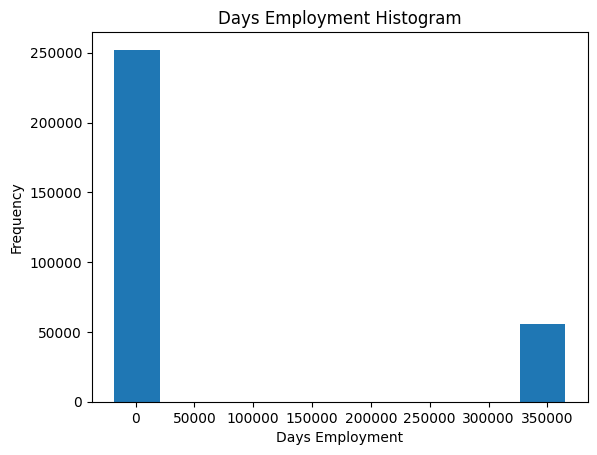

In [141]:
align_train_data['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [142]:
col_with_anom = align_train_data['DAYS_EMPLOYED'] >= 36500
print('Number of anomalies : ', col_with_anom.sum())
print(align_train_data['DAYS_EMPLOYED'][col_with_anom].value_counts())
#only one value 365243 is the issue 

Number of anomalies :  55374
365243    55374
Name: DAYS_EMPLOYED, dtype: int64


In [143]:
# Replace the anomalous values with nan
align_train_data['DAYS_EMPLOYED'].replace({365243 : np.nan}, inplace=True)
align_test_data['DAYS_EMPLOYED'].replace({365243 : np.nan}, inplace=True)
align_train_data['DAYS_EMPLOYED'].describe()

count   252,133.00
mean     -2,384.14
std       2,338.33
min     -17,912.00
25%      -3,175.00
50%      -1,648.00
75%        -767.00
max           0.00
Name: DAYS_EMPLOYED, dtype: float64

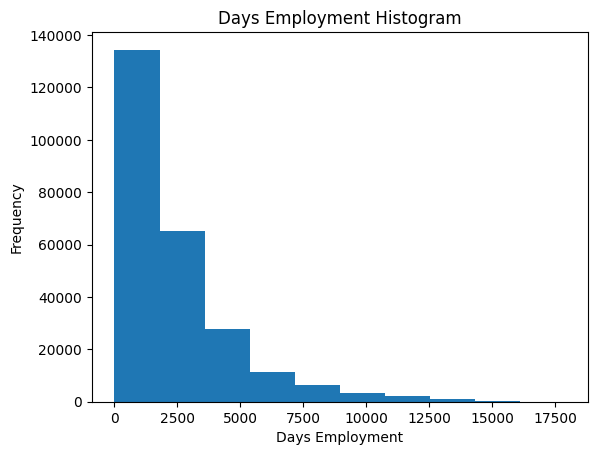

In [144]:
align_train_data['DAYS_EMPLOYED'] = abs(align_train_data['DAYS_EMPLOYED'])
align_test_data['DAYS_EMPLOYED'] = abs(align_test_data['DAYS_EMPLOYED'])

#Now plot histogram to visualize days of employment distribution
align_train_data['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

Lets correlate with TARGET

In [145]:
Correlation=align_train_data.corr()
HighCorr=np.sum(Correlation>0.7)
HighCorrIndex=HighCorr[HighCorr>1].index
print(HighCorrIndex)

Index(['CNT_CHILDREN', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
    

As mean, median and mode apartment measurements are highly correlated, we will remove two of the three sets of features. We will also remocve OBS_30, OBS_60, DEF_30, DEF_60

In [146]:
del_col = ['APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
         'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE',
         'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
         'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',  'NONLIVINGAREA_MODE', 
         'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',  
         'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 
         'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
         'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',  
         'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 
         'OBS_60_CNT_SOCIAL_CIRCLE',  'DEF_60_CNT_SOCIAL_CIRCLE']

In [147]:
align_train_data.drop(del_col,inplace=True,axis=1)
align_test_data.drop(del_col,inplace=True,axis=1)

In [148]:
print(align_train_data.shape)
print(align_test_data.shape)

(307507, 219)
(48744, 218)


In [149]:
del_col=[]

#For rest of the columns lets study their relation with Target

In [150]:

Correlation['CNT_CHILDREN'][Correlation['CNT_CHILDREN']>0.7] #{CNT_FAM_MEMBERS,'CNT_CHILDREN' }


CNT_CHILDREN      1.00
CNT_FAM_MEMBERS   0.88
Name: CNT_CHILDREN, dtype: float64

In [151]:
Correlation['TARGET'][['CNT_FAM_MEMBERS','CNT_CHILDREN']]

CNT_FAM_MEMBERS   0.01
CNT_CHILDREN      0.02
Name: TARGET, dtype: float64

In [152]:
del_col.append('CNT_FAM_MEMBERS')

In [153]:
Correlation['AMT_CREDIT'][Correlation['AMT_CREDIT']>0.7]

AMT_CREDIT        1.00
AMT_ANNUITY       0.77
AMT_GOODS_PRICE   0.99
Name: AMT_CREDIT, dtype: float64

In [154]:
Correlation['TARGET'][['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']]

AMT_CREDIT        -0.03
AMT_ANNUITY       -0.01
AMT_GOODS_PRICE   -0.04
Name: TARGET, dtype: float64

In [155]:
del_col.append('AMT_CREDIT')
del_col.append('AMT_ANNUITY')

In [156]:
Correlation[ 'REGION_RATING_CLIENT_W_CITY'][Correlation[ 'REGION_RATING_CLIENT_W_CITY']>0.7]

REGION_RATING_CLIENT          0.95
REGION_RATING_CLIENT_W_CITY   1.00
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64

In [157]:
Correlation['TARGET'][['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']]
del_col.append('REGION_RATING_CLIENT_W_CITY')

In [158]:
Correlation['REG_REGION_NOT_WORK_REGION'][Correlation['REG_REGION_NOT_WORK_REGION']>0.7]

REG_REGION_NOT_WORK_REGION    1.00
LIVE_REGION_NOT_WORK_REGION   0.86
Name: REG_REGION_NOT_WORK_REGION, dtype: float64

In [159]:
Correlation['TARGET'][['REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION']]
del_col.append('LIVE_REGION_NOT_WORK_REGION')

In [160]:
Correlation['REG_CITY_NOT_WORK_CITY'][Correlation['REG_CITY_NOT_WORK_CITY']>0.7]

REG_CITY_NOT_WORK_CITY    1.00
LIVE_CITY_NOT_WORK_CITY   0.83
Name: REG_CITY_NOT_WORK_CITY, dtype: float64

In [161]:
Correlation['TARGET'][['REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']]
del_col.append('LIVE_CITY_NOT_WORK_CITY')

In [162]:
align_train_data.drop(del_col,inplace=True,axis=1)
align_test_data.drop(del_col,inplace=True,axis=1)
print(align_train_data.shape)
print(align_test_data.shape)

(307507, 213)
(48744, 212)


Removing the columns where 50% of the values are missing 

In [163]:
desc=align_train_data.describe().T
desc['missing %']=1-(desc['count']/len(align_train_data))
desc[desc['missing %']>0.5]

,count,mean,std,min,25%,50%,75%,max,missing %
OWN_CAR_AGE,"104,580.00",12.06,11.94,0.00,5.00,9.00,15.00,91.00,0.66
EXT_SOURCE_1,"134,131.00",0.50,0.21,0.01,0.33,0.51,0.68,0.96,0.56
APARTMENTS_AVG,"151,447.00",0.12,0.11,0.00,0.06,0.09,0.15,1.00,0.51
BASEMENTAREA_AVG,"127,565.00",0.09,0.08,0.00,0.04,0.08,0.11,1.00,0.59
YEARS_BUILD_AVG,"103,021.00",0.75,0.11,0.00,0.69,0.76,0.82,1.00,0.66
COMMONAREA_AVG,"92,645.00",0.04,0.08,0.00,0.01,0.02,0.05,1.00,0.70
ELEVATORS_AVG,"143,617.00",0.08,0.13,0.00,0.00,0.00,0.12,1.00,0.53
ENTRANCES_AVG,"152,680.00",0.15,0.10,0.00,0.07,0.14,0.21,1.00,0.50
FLOORSMIN_AVG,"98,867.00",0.23,0.16,0.00,0.08,0.21,0.38,1.00,0.68
LANDAREA_AVG,"124,919.00",0.07,0.08,0.00,0.02,0.05,0.09,1.00,0.59


In [164]:
align_train_data.drop(list(desc[desc['missing %']>0.5]['missing %'].index),axis=1,inplace=True)
align_test_data.drop(list(desc[desc['missing %']>0.5]['missing %'].index),axis=1,inplace=True)
print(align_train_data.shape)
print(align_test_data.shape)

(307507, 199)
(48744, 198)


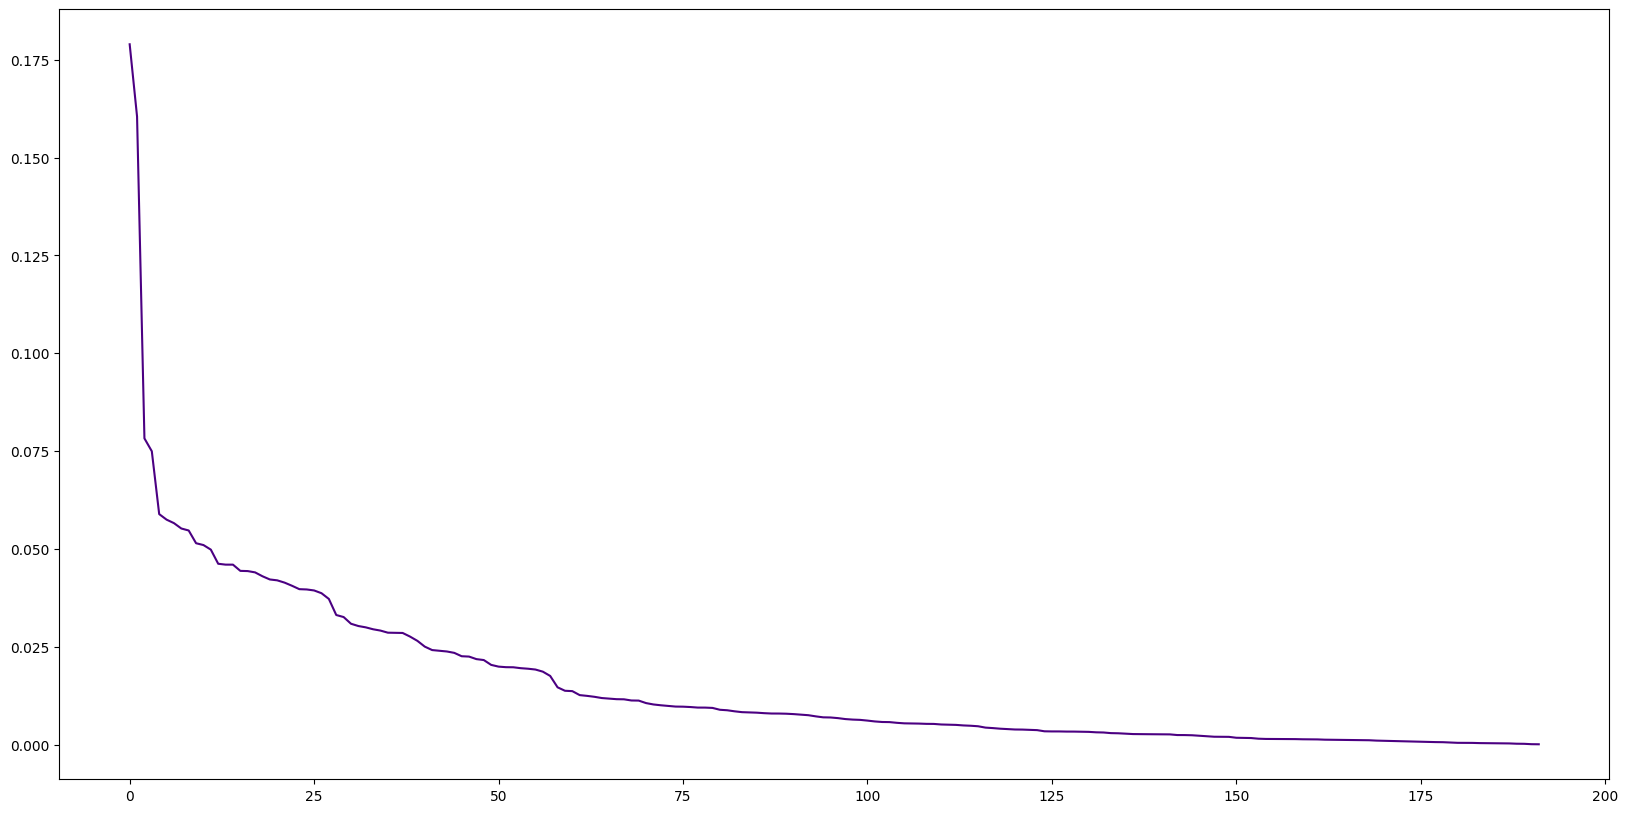

<Figure size 640x480 with 0 Axes>

In [165]:
Corr1=abs(align_train_data.corr()['TARGET'])

plt.figure(figsize=(20,10))
plt.plot(Corr1.drop('TARGET').sort_values(ascending=False).reset_index()['TARGET'],color='indigo')
plt.show()
plt.savefig('CorrTarget.png',dpi=300,bbox_inches='tight')

In [166]:
Corr1.sort_values(ascending=False)[1:84].index

Index(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'REGION_RATING_CLIENT', 'NAME_INCOME_TYPE_Working',
       'NAME_EDUCATION_TYPE_Higher education', 'DAYS_LAST_PHONE_CHANGE',
       'CODE_GENDER', 'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_INCOME_TYPE_Pensioner', 'ORGANIZATION_TYPE_XNA', 'FLAG_EMP_PHONE',
       'REG_CITY_NOT_LIVE_CITY', 'FLAG_DOCUMENT_3', 'FLOORSMAX_AVG',
       'OCCUPATION_TYPE_Laborers', 'EMERGENCYSTATE_MODE_No',
       'DAYS_REGISTRATION', 'EMERGENCYSTATE_MODE_nan',
       'HOUSETYPE_MODE_block of flats', 'HOUSETYPE_MODE_nan',
       'AMT_GOODS_PRICE', 'WALLSMATERIAL_MODE_nan', 'OCCUPATION_TYPE_nan',
       'REGION_POPULATION_RELATIVE', 'WALLSMATERIAL_MODE_Panel',
       'TOTALAREA_MODE', 'NAME_CONTRACT_TYPE', 'OCCUPATION_TYPE_Drivers',
       'NAME_HOUSING_TYPE_With parents', 'FONDKAPREMONT_MODE_nan',
       'ORGANIZATION_TYPE_Self-employed', 'FLAG_DOCUMENT_6',
  

In [167]:
application_train = align_train_data[['TARGET','EXT_SOURCE_3', 'EXT_SOURCE_2', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'REGION_RATING_CLIENT', 'NAME_INCOME_TYPE_Working',
       'NAME_EDUCATION_TYPE_Higher education', 'DAYS_LAST_PHONE_CHANGE',
       'CODE_GENDER', 'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_INCOME_TYPE_Pensioner', 'ORGANIZATION_TYPE_XNA', 'FLAG_EMP_PHONE',
       'REG_CITY_NOT_LIVE_CITY', 'FLAG_DOCUMENT_3', 'FLOORSMAX_AVG',
       'OCCUPATION_TYPE_Laborers', 'EMERGENCYSTATE_MODE_No',
       'DAYS_REGISTRATION', 'EMERGENCYSTATE_MODE_nan',
       'HOUSETYPE_MODE_block of flats', 'HOUSETYPE_MODE_nan',
       'AMT_GOODS_PRICE', 'WALLSMATERIAL_MODE_nan', 'OCCUPATION_TYPE_nan',
       'REGION_POPULATION_RELATIVE', 'WALLSMATERIAL_MODE_Panel',
       'TOTALAREA_MODE', 'NAME_CONTRACT_TYPE', 'OCCUPATION_TYPE_Drivers',
       'NAME_HOUSING_TYPE_With parents', 'FONDKAPREMONT_MODE_nan',
       'ORGANIZATION_TYPE_Self-employed', 'FLAG_DOCUMENT_6',
       'NAME_HOUSING_TYPE_House / apartment', 'FLAG_WORK_PHONE',
       'OCCUPATION_TYPE_Low-skill Laborers',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Married',
       'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE_Business Entity Type 3',
       'FLAG_PHONE', 'NAME_INCOME_TYPE_State servant',
       'FONDKAPREMONT_MODE_reg oper account',
       'NAME_FAMILY_STATUS_Civil marriage', 'FLAG_OWN_CAR',
       'OCCUPATION_TYPE_Accountants', 'OCCUPATION_TYPE_Core staff',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'ORGANIZATION_TYPE_Construction',
       'NAME_HOUSING_TYPE_Rented apartment', 'OCCUPATION_TYPE_Sales staff',
       'NAME_FAMILY_STATUS_Widow', 'CNT_CHILDREN', 'OCCUPATION_TYPE_Managers',
       'ORGANIZATION_TYPE_Transport: type 3', 'OCCUPATION_TYPE_Security staff',
       'OCCUPATION_TYPE_High skill tech staff', 'ORGANIZATION_TYPE_School',
       'WALLSMATERIAL_MODE_Stone, brick', 'AMT_REQ_CREDIT_BUREAU_MON',
       'OCCUPATION_TYPE_Cooking staff',
       'NAME_INCOME_TYPE_Commercial associate',
       'NAME_EDUCATION_TYPE_Lower secondary', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_13', 'FONDKAPREMONT_MODE_org spec account',
       'FONDKAPREMONT_MODE_reg oper spec account',
       'ORGANIZATION_TYPE_Medicine', 'ORGANIZATION_TYPE_Restaurant',
       'ORGANIZATION_TYPE_Military', 'ORGANIZATION_TYPE_Police',
       'YEARS_BEGINEXPLUATATION_AVG', 'ORGANIZATION_TYPE_Industry: type 3',
       'ORGANIZATION_TYPE_Bank', 'ORGANIZATION_TYPE_Security Ministries',
       'FLAG_DOCUMENT_14', 'WALLSMATERIAL_MODE_Monolithic',
       'ORGANIZATION_TYPE_Trade: type 3', 'NAME_INCOME_TYPE_Unemployed',
       'OCCUPATION_TYPE_Medicine staff']]

In [168]:
application_test = align_test_data[['EXT_SOURCE_3', 'EXT_SOURCE_2', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'REGION_RATING_CLIENT', 'NAME_INCOME_TYPE_Working',
       'NAME_EDUCATION_TYPE_Higher education', 'DAYS_LAST_PHONE_CHANGE',
       'CODE_GENDER', 'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_INCOME_TYPE_Pensioner', 'ORGANIZATION_TYPE_XNA', 'FLAG_EMP_PHONE',
       'REG_CITY_NOT_LIVE_CITY', 'FLAG_DOCUMENT_3', 'FLOORSMAX_AVG',
       'OCCUPATION_TYPE_Laborers', 'EMERGENCYSTATE_MODE_No',
       'DAYS_REGISTRATION', 'EMERGENCYSTATE_MODE_nan',
       'HOUSETYPE_MODE_block of flats', 'HOUSETYPE_MODE_nan',
       'AMT_GOODS_PRICE', 'WALLSMATERIAL_MODE_nan', 'OCCUPATION_TYPE_nan',
       'REGION_POPULATION_RELATIVE', 'WALLSMATERIAL_MODE_Panel',
       'TOTALAREA_MODE', 'NAME_CONTRACT_TYPE', 'OCCUPATION_TYPE_Drivers',
       'NAME_HOUSING_TYPE_With parents', 'FONDKAPREMONT_MODE_nan',
       'ORGANIZATION_TYPE_Self-employed', 'FLAG_DOCUMENT_6',
       'NAME_HOUSING_TYPE_House / apartment', 'FLAG_WORK_PHONE',
       'OCCUPATION_TYPE_Low-skill Laborers',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Married',
       'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE_Business Entity Type 3',
       'FLAG_PHONE', 'NAME_INCOME_TYPE_State servant',
       'FONDKAPREMONT_MODE_reg oper account',
       'NAME_FAMILY_STATUS_Civil marriage', 'FLAG_OWN_CAR',
       'OCCUPATION_TYPE_Accountants', 'OCCUPATION_TYPE_Core staff',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'ORGANIZATION_TYPE_Construction',
       'NAME_HOUSING_TYPE_Rented apartment', 'OCCUPATION_TYPE_Sales staff',
       'NAME_FAMILY_STATUS_Widow', 'CNT_CHILDREN', 'OCCUPATION_TYPE_Managers',
       'ORGANIZATION_TYPE_Transport: type 3', 'OCCUPATION_TYPE_Security staff',
       'OCCUPATION_TYPE_High skill tech staff', 'ORGANIZATION_TYPE_School',
       'WALLSMATERIAL_MODE_Stone, brick', 'AMT_REQ_CREDIT_BUREAU_MON',
       'OCCUPATION_TYPE_Cooking staff',
       'NAME_INCOME_TYPE_Commercial associate',
       'NAME_EDUCATION_TYPE_Lower secondary', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_13', 'FONDKAPREMONT_MODE_org spec account',
       'FONDKAPREMONT_MODE_reg oper spec account',
       'ORGANIZATION_TYPE_Medicine', 'ORGANIZATION_TYPE_Restaurant',
       'ORGANIZATION_TYPE_Military', 'ORGANIZATION_TYPE_Police',
       'YEARS_BEGINEXPLUATATION_AVG', 'ORGANIZATION_TYPE_Industry: type 3',
       'ORGANIZATION_TYPE_Bank', 'ORGANIZATION_TYPE_Security Ministries',
       'FLAG_DOCUMENT_14', 'WALLSMATERIAL_MODE_Monolithic',
       'ORGANIZATION_TYPE_Trade: type 3', 'NAME_INCOME_TYPE_Unemployed',
       'OCCUPATION_TYPE_Medicine staff']]

**Logistic Regression**

In [169]:
from sklearn.preprocessing import StandardScaler
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import pandas.core.algorithms as algos
import scipy.stats.stats as stats
from sklearn.metrics import log_loss
from sklearn.metrics import average_precision_score
from sklearn.neural_network import MLPClassifier

In [170]:
# Utility functions to fix missing values    
def impute_missing_values(train_data, test_data):
    """
    check for the missing values and impute it with mean values of the columns
    in both train and test data
    """
    from sklearn.impute import SimpleImputer
    import numpy as np

    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    imputed_train_data = imputer.fit_transform(train_data)
    imputed_test_data = imputer.transform(test_data)
    return imputed_train_data, imputed_test_data

In [171]:
#impute the missing values
X=application_train.drop('TARGET',axis=1)
y=application_train['TARGET']
X, X_test = impute_missing_values(X, application_test)
print('training data shape after imputing missing values: ', X.shape)
print('testing data shape after imputing missing values: ', X_test.shape)
print(y.shape)

training data shape after imputing missing values:  (307507, 83)
testing data shape after imputing missing values:  (48744, 83)
(307507,)


In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=0)

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 
y.value_counts()

0    282682
1     24825
Name: TARGET, dtype: int64

In [173]:
LogClassifier= LogisticRegression(random_state = 0)
start=time.time()
print(X_train.shape[0],y.shape[0])
LogClassifier.fit(X_train, y_train)
end=time.time()
y_pred=LogClassifier.predict(X_test)
y_pred_prob=LogClassifier.predict_proba(X_test)[:, 1]
y_train_pred_prob=LogClassifier.predict_proba(X_train)[:, 1]

print('Correct accuracy of the train set with Logistic Regression is:', round(LogClassifier.score(X_train,y_train)*100,4),'%')
print('Correct accuracy of the test set with Logistic Regression is:', round(LogClassifier.score(X_test,y_test)*100,4),'%')
print('')
print('Total elapsed time is:', round(end-start,4),' sec')
print('')
print('Confusion Matrix is:')
print(confusion_matrix(y_test, y_pred))
print('')
print('Logistic Regression log_loss is:',round(log_loss(y_test, y_pred),4))
average_precision = average_precision_score(y_test, y_pred)
print('')
print('Average precision-recall score: {0:0.4f}'.format(average_precision))


215254 307507
Correct accuracy of the train set with Logistic Regression is: 91.9249 %
Correct accuracy of the test set with Logistic Regression is: 91.9276 %

Total elapsed time is: 7.5043  sec

Confusion Matrix is:
[[84740    80]
 [ 7367    66]]

Logistic Regression log_loss is: 2.9096

Average precision-recall score: 0.0839


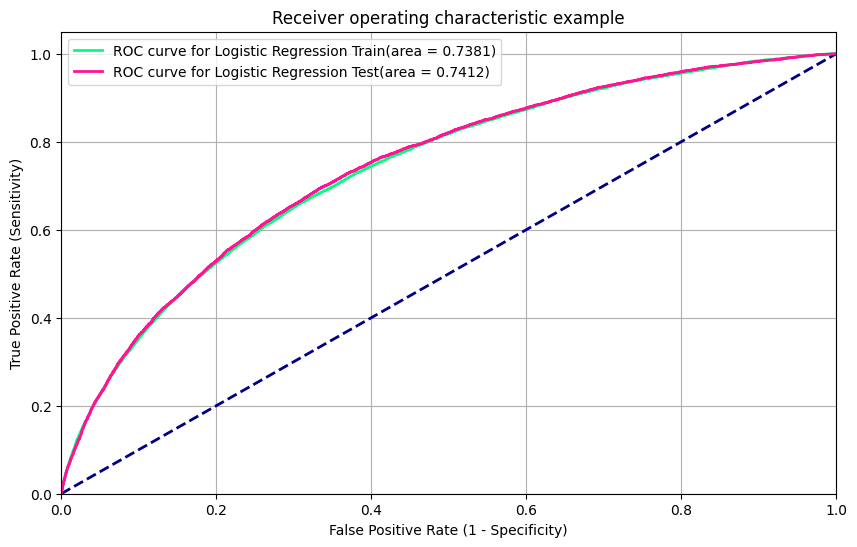

<Figure size 640x480 with 0 Axes>

In [174]:
fpr, tpr, thresholds=roc_curve(y_train, y_train_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,6))
lw = 2
plt.plot(fpr, tpr, color='springgreen',lw=lw, label='ROC curve for Logistic Regression Train(area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1],lw=lw, color='navy', linestyle='--')
roc_aucTrain=roc_auc
fpr, tpr, thresholds=roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='deeppink',lw=lw, label='ROC curve for Logistic Regression Test(area = %0.4f)' % roc_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.grid(True)

plt.legend(loc=0)
plt.show()
plt.savefig('LG.png',dpi=300,bbox_inches='tight')
y_log=y_test
y_pred_log=y_pred_prob

ResultLG={'AUC Train':roc_aucTrain, 'AUC Test':roc_auc,'Average Precision Score':average_precision,
          'Log Loss Score':round(log_loss(y_test, y_pred),4),'Elapsed Time':round(end-start,4) }

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [180]:
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
y_proba=clf.predict_proba(X_test)[:,1]

y_train_pred_prob=clf.predict_proba(X_train)[:, 1]

print('Correct accuracy of the train set with LightGBM is:', round(clf.score(X_train,y_train)*100,4),'%')
print('Correct accuracy of the test set with LightGBM is:', round(clf.score(X_test,y_test)*100,4),'%')
print('')
print('Total elapsed time is:', round(end-start,4),' sec')
print('')
print('Confusion Matrix is:')
print(confusion_matrix(y_test, y_pred))
print('')
print('LightGBM log_loss is:',round(log_loss(y_test, y_pred),4))
average_precision = average_precision_score(y_test, y_pred)
print('')
print('Average precision-recall score: {0:0.4f}'.format(average_precision))


LightGBM Model accuracy score: 0.9201
Correct accuracy of the train set with LightGBM is: 91.9928 %
Correct accuracy of the test set with LightGBM is: 92.0133 %

Total elapsed time is: 7.5043  sec

Confusion Matrix is:
[[56527    51]
 [ 4861    63]]

LightGBM log_loss is: 2.8787

Average precision-recall score: 0.0861


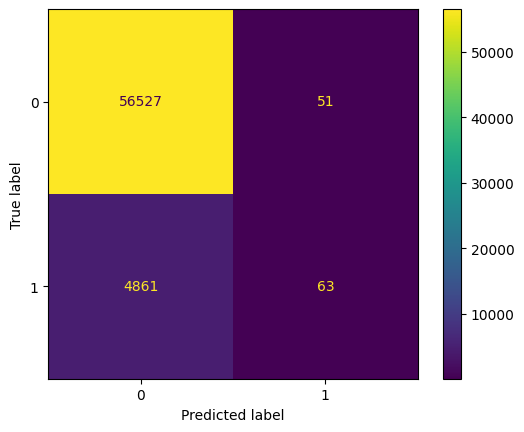

In [177]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred,labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [178]:
print('')
average_precision = average_precision_score(y_test, y_pred)
print('')
print('Average precision-recall score: {0:0.4f}'.format(average_precision))



Average precision-recall score: 0.0861


AUC plot

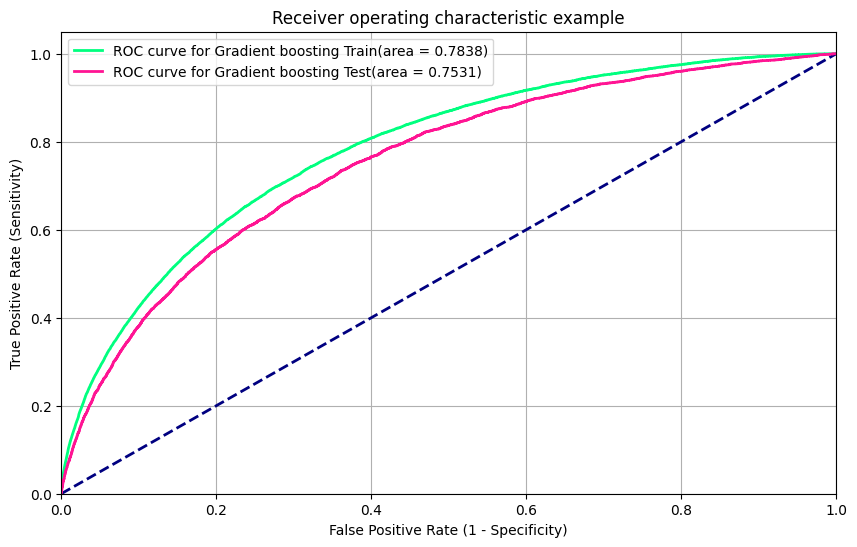

<Figure size 640x480 with 0 Axes>

In [179]:
fpr, tpr, thresholds=roc_curve(y_train, y_train_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,6))
lw = 2
plt.plot(fpr, tpr, color='springgreen',lw=lw, label='ROC curve for Gradient boosting Train(area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1],lw=lw, color='navy', linestyle='--')
roc_aucTrain=roc_auc
fpr, tpr, thresholds=roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='deeppink',lw=lw, label='ROC curve for Gradient boosting Test(area = %0.4f)' % roc_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.grid(True)

plt.legend(loc=0)
plt.show()
plt.savefig('LG.png',dpi=300,bbox_inches='tight')
y_log=y_test
y_pred_log=y_pred_prob

ResultLG={'AUC Train':roc_aucTrain, 'AUC Test':roc_auc,'Average Precision Score':average_precision,
          'Log Loss Score':round(log_loss(y_test, y_pred),4),'Elapsed Time':round(end-start,4) }